In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import pandas as pd

file_path = 'data.csv'
data = pd.read_csv(file_path)

data.head()


,title,content
0,菩萨蛮·平林漠漠烟如织,\n平林漠漠烟如织，寒山一带伤心碧。暝色入高楼，有人楼上愁。玉阶空伫立，宿鸟归飞急。何处是归...
1,忆秦娥·箫声咽,\n箫声咽，秦娥梦断秦楼月。秦楼月，年年柳色，灞陵伤别。乐游原上清秋节，咸阳古道音尘绝。音尘...
2,三五七言 / 秋风词,\n秋风清，秋月明，落叶聚还散，寒鸦栖复惊。相思相见知何日？此时此夜难为情！入我相思门，知我...
3,渔歌子·西塞山前白鹭飞,\n西塞山前白鹭飞，桃花流水鳜鱼肥。青箬笠，绿蓑衣，斜风细雨不须归。\n
4,调笑令·边草,\n边草，边草，边草尽来兵老。山南山北雪晴， 千里万里月明。明月，明月，胡笳一声愁绝。\n


In [3]:
import jieba

def jieba_tokenizer(text):
    # 使用jieba进行分词
    words = jieba.cut(text)
    # 过滤掉一些无意义的字符（可根据需要调整）
    filtered_words = [word for word in words if len(word) > 1 and word != '\r\n']
    return filtered_words

# 应用分词到数据集
data['tokenized_content'] = data['content'].apply(jieba_tokenizer)

# 显示分词结果
print(data['tokenized_content'].head())


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Naasi\AppData\Local\Temp\jieba.cache


Loading model cost 0.524 seconds.
Prefix dict has been built successfully.


0    [平林, 漠漠, 如织, 寒山, 一带, 伤心, 色入, 高楼, 有人, 楼上, 玉阶空, ...
1    [箫声, 秦娥, 梦断, 秦楼, 秦楼, 柳色, 灞陵, 伤别, 乐游, 原上, 清秋节, ...
2    [秋风, 秋月明, 落叶, 寒鸦, 栖复, 相思, 相见, 何日, 此时, 此夜, 难为情,...
3               [西塞山, 白鹭飞, 桃花流水, 鳜鱼, 箬笠, 蓑衣, 斜风细雨, 不须]
4    [边草, 边草, 边草, 尽来, 山南, 山北, 雪晴, 千里, 万里, 月明, 明月, 明...
Name: tokenized_content, dtype: object


In [4]:
all_words = [word for tokens in data['tokenized_content'] for word in tokens]

unique_words = set(all_words)

word_to_num = {word: i for i, word in enumerate(unique_words)}
num_to_word = {i: word for word, i in word_to_num.items()}

data['numerical_sequences'] = data['tokenized_content'].apply(lambda tokens: [word_to_num[word] for word in tokens])

len(unique_words), data['numerical_sequences'].head()


(5124,
 0    [989, 452, 1096, 2060, 4888, 3382, 3039, 3567,...
 1    [3649, 65, 1614, 187, 187, 2798, 2932, 4846, 1...
 2    [2978, 779, 1661, 3229, 3559, 2135, 2276, 2593...
 3         [3475, 2895, 2778, 435, 1635, 73, 2971, 375]
 4    [804, 804, 804, 3296, 4954, 2261, 584, 3256, 3...
 Name: numerical_sequences, dtype: object)

In [38]:
len(word_to_num)

5124

In [5]:
word_to_num

{'尽入': 0,
 '催谢': 1,
 '彩袖': 2,
 '暗香': 3,
 '最娇软': 4,
 '心似': 5,
 '这场': 6,
 '马作': 7,
 '绝代': 8,
 '惟宜': 9,
 '路遥': 10,
 '心上': 11,
 '暗尘': 12,
 '如故': 13,
 '湖边': 14,
 '前见': 15,
 '屏山': 16,
 '离肠': 17,
 '复别': 18,
 '芳尘': 19,
 '堤沙': 20,
 '雪里': 21,
 '高举': 22,
 '烦恼': 23,
 '向秋': 24,
 '烽火': 25,
 '触目': 26,
 '旧栖新': 27,
 '汉箭朝': 28,
 '以授': 29,
 '可可': 30,
 '危阑倚': 31,
 '山下': 32,
 '醉里且': 33,
 '瑶席': 34,
 '旗不湿': 35,
 '春来': 36,
 '障风映': 37,
 '家家': 38,
 '别绪': 39,
 '留人': 40,
 '当时': 41,
 '吊月': 42,
 '无可奈何花落去': 43,
 '喷霜竹': 44,
 '云妨': 45,
 '落后': 46,
 '停云': 47,
 '伫立': 48,
 '辛卯': 49,
 '准拟': 50,
 '雕弓': 51,
 '兽烟': 52,
 '回顾': 53,
 '豪客': 54,
 '花间': 55,
 '方寸': 56,
 '水殿': 57,
 '不解': 58,
 '辞镜': 59,
 '向晚': 60,
 '曾为': 61,
 '侠气': 62,
 '一团': 63,
 '烟树': 64,
 '秦娥': 65,
 '自流': 66,
 '隐约': 67,
 '叶底': 68,
 '李伴': 69,
 '半敛': 70,
 '泪空流': 71,
 '书生': 72,
 '蓑衣': 73,
 '令尊': 74,
 '辘轳': 75,
 '香非': 76,
 '脉脉': 77,
 '难得': 78,
 '五首': 79,
 '千种': 80,
 '山中': 81,
 '事往': 82,
 '愁绝': 83,
 '迎客': 84,
 '已入': 85,
 '身为': 86,
 '蝶舞': 87,
 '燕归': 88,
 '冷香': 89,
 '穿空':

In [6]:
num_to_word

{0: '尽入',
 1: '催谢',
 2: '彩袖',
 3: '暗香',
 4: '最娇软',
 5: '心似',
 6: '这场',
 7: '马作',
 8: '绝代',
 9: '惟宜',
 10: '路遥',
 11: '心上',
 12: '暗尘',
 13: '如故',
 14: '湖边',
 15: '前见',
 16: '屏山',
 17: '离肠',
 18: '复别',
 19: '芳尘',
 20: '堤沙',
 21: '雪里',
 22: '高举',
 23: '烦恼',
 24: '向秋',
 25: '烽火',
 26: '触目',
 27: '旧栖新',
 28: '汉箭朝',
 29: '以授',
 30: '可可',
 31: '危阑倚',
 32: '山下',
 33: '醉里且',
 34: '瑶席',
 35: '旗不湿',
 36: '春来',
 37: '障风映',
 38: '家家',
 39: '别绪',
 40: '留人',
 41: '当时',
 42: '吊月',
 43: '无可奈何花落去',
 44: '喷霜竹',
 45: '云妨',
 46: '落后',
 47: '停云',
 48: '伫立',
 49: '辛卯',
 50: '准拟',
 51: '雕弓',
 52: '兽烟',
 53: '回顾',
 54: '豪客',
 55: '花间',
 56: '方寸',
 57: '水殿',
 58: '不解',
 59: '辞镜',
 60: '向晚',
 61: '曾为',
 62: '侠气',
 63: '一团',
 64: '烟树',
 65: '秦娥',
 66: '自流',
 67: '隐约',
 68: '叶底',
 69: '李伴',
 70: '半敛',
 71: '泪空流',
 72: '书生',
 73: '蓑衣',
 74: '令尊',
 75: '辘轳',
 76: '香非',
 77: '脉脉',
 78: '难得',
 79: '五首',
 80: '千种',
 81: '山中',
 82: '事往',
 83: '愁绝',
 84: '迎客',
 85: '已入',
 86: '身为',
 87: '蝶舞',
 88: '燕归',
 89: '冷香',
 90: '

In [39]:
import numpy as np

# 参数初始化
vocab_size = len(word_to_num)  # 词汇表大小
hidden_size = 100  # 隐藏层神经元数量
learning_rate = 1e-1

# 权重初始化
Wxh = np.random.randn(hidden_size, vocab_size)*0.01  # 输入到隐藏层
Whh = np.random.randn(hidden_size, hidden_size)*0.01  # 隐藏层到隐藏层
Why = np.random.randn(vocab_size, hidden_size)*0.01  # 隐藏层到输出层
bh = np.zeros((hidden_size, 1))  # 隐藏层偏置
by = np.zeros((vocab_size, 1))   # 输出层偏置


In [41]:
import numpy as np
sequence_length = 20  # 选择序列长度
features = []
labels = []

for poem in data['numerical_sequences']:
    for i in range(len(poem) - sequence_length):
        # 提取长度为sequence_length的序列和下一个词作为标签
        seq = poem[i:i + sequence_length]
        label = poem[i + sequence_length]
        features.append(seq)
        labels.append(label)

features = np.array(features)
labels = np.array(labels)

# 数据分割
train_size = int(len(features) * 0.8)
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]

print(features)

[[3645 3867 4328 ...  563 2017 2991]
 [3867 4328 3343 ... 2017 2991 1119]
 [4945 3825  813 ... 4490 4945 4952]
 ...
 [1747 1061 1081 ... 3588  728 4305]
 [1061 1081 4328 ...  728 4305 1394]
 [1081 4328 3472 ... 4305 1394 3412]]


In [42]:
print(labels)

[1119 3204 4773 ... 1394 3412  159]


Epoch 0, Loss: 8.545804439891468
Epoch 10, Loss: 2.0354562824422664
Epoch 20, Loss: 0.29863462393934076
Epoch 30, Loss: 0.10758722018111835
Epoch 40, Loss: 0.05472360503944484
Epoch 50, Loss: 0.0320382301102985
Epoch 60, Loss: 0.023087743669748306
Epoch 70, Loss: 0.013676622340624982
Epoch 80, Loss: 0.009357257255099036
Epoch 90, Loss: 0.01276669693602757


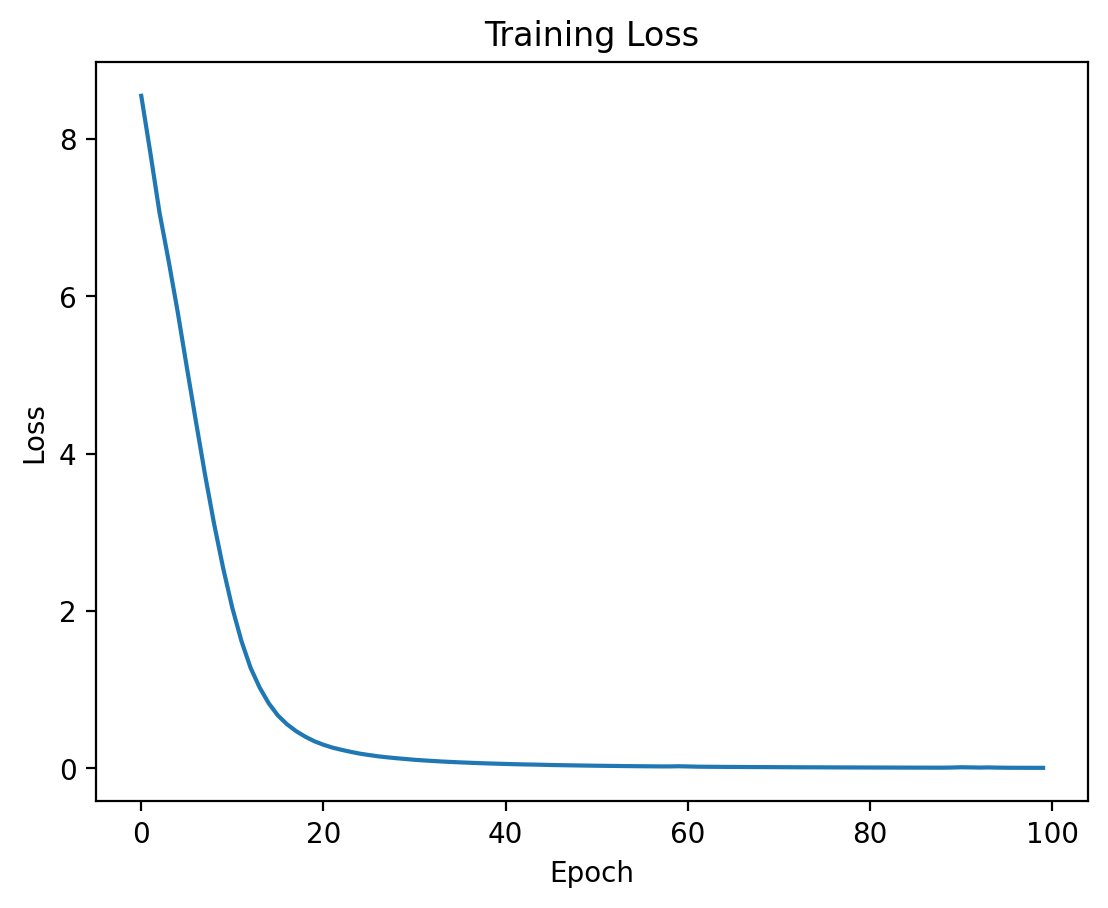

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
# 定义模型
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out

# 实例化模型
vocab_size = len(word_to_num)  # 词汇表大小
embedding_dim = 100            # 嵌入维度
hidden_dim = 128               # LSTM隐藏层维度
model = LSTMModel(vocab_size, embedding_dim, hidden_dim)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练轮数
num_epochs = 100
# 训练模型
train_features_tensor = torch.tensor(train_features, dtype=torch.long)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

test_features_tensor = torch.tensor(test_features, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# for epoch in range(num_epochs):
#     for batch in train_loader: 
#         inputs, targets = batch
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()
#     if(epoch%10==0): print(f'Epoch {epoch}, Loss: {loss.item()}')
losses = []  # 用于存储每个周期的损失值

for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    average_loss = total_loss / len(train_loader)
    losses.append(average_loss)
    
    if(epoch % 10 == 0):
        print(f'Epoch {epoch}, Loss: {average_loss}')

plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [44]:
model.eval()  # 将模型设置为评估模式
test_loss, correct = 0, 0

with torch.no_grad():  # 在评估期间不计算梯度
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, targets).item()  # 累加损失
        correct += (outputs.argmax(1) == targets).type(torch.float).sum().item()  # 计算正确预测数

test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss}')


Test Loss: 0.43990102671258463


In [45]:
word_to_num

{'酒盏': 0,
 '吴山翠': 1,
 '青骢': 2,
 '浪淘尽': 3,
 '许多': 4,
 '转溪桥': 5,
 '桥桥': 6,
 '远远': 7,
 '七八个': 8,
 '心会': 9,
 '永丰': 10,
 '付与': 11,
 '风流云散': 12,
 '春初': 13,
 '齐鲁': 14,
 '牵情': 15,
 '欲知': 16,
 '前度刘郎': 17,
 '雁字': 18,
 '不尽': 19,
 '红玉阶前': 20,
 '当门': 21,
 '因何': 22,
 '黄花瘦': 23,
 '回时': 24,
 '隐映': 25,
 '楼空': 26,
 '梦魂间': 27,
 '一点': 28,
 '莫道': 29,
 '彭城': 30,
 '自语': 31,
 '残英': 32,
 '系粤': 33,
 '离怀别': 34,
 '曾行': 35,
 '杜若': 36,
 '多少': 37,
 '不忍': 38,
 '太行山': 39,
 '冯唐': 40,
 '留意': 41,
 '篱落': 42,
 '楼观': 43,
 '愁到': 44,
 '吹凉': 45,
 '自暖': 46,
 '时代': 47,
 '窥见': 48,
 '醉乡': 49,
 '春恨': 50,
 '新晴': 51,
 '比拟': 52,
 '海棠': 53,
 '倚楼': 54,
 '渐别浦': 55,
 '惊人': 56,
 '君心': 57,
 '一梦': 58,
 '柔蓝': 59,
 '蓑衣': 60,
 '山映': 61,
 '望眼': 62,
 '为主': 63,
 '菊花': 64,
 '闲情': 65,
 '白云': 66,
 '但望': 67,
 '一尊': 68,
 '一何': 69,
 '二十里': 70,
 '心字': 71,
 '今日': 72,
 '妓隶习': 73,
 '随分': 74,
 '千花': 75,
 '如霜': 76,
 '旧时': 77,
 '红英落': 78,
 '底下': 79,
 '空老': 80,
 '星河': 81,
 '潮平路': 82,
 '送春归': 83,
 '春光': 84,
 '青鸟': 85,
 '暮雨洒': 86,
 '可堪': 87,
 '寄相思': 88,
 '金缕': 89

In [47]:
import random
def generate_quatrain(model, start_sequence, sequence_length, num_lines=4, words_per_line=3):
    model.eval()  # 设置为评估模式
    words = start_sequence.split()
    poem = []

    for _ in range(num_lines):
        line = []
        for _ in range(words_per_line):
            input_sequence = [word_to_num.get(word, random.choice(list(word_to_num.values()))) for word in words[-sequence_length:]]
            input_sequence = input_sequence[-sequence_length:]  # 确保序列长度正确
            input_tensor = torch.LongTensor(input_sequence).unsqueeze(0)
            with torch.no_grad():
                output = model(input_tensor)
            next_word = num_to_word[output.argmax(1).item()]
            line.append(next_word)
            words.append(next_word)
        poem.append(''.join(line))

    return '\n'.join(poem)

# 使用模型生成四言绝句
start_sequence = "江雪"
generated_poem = generate_quatrain(model, start_sequence, sequence_length)
print(generated_poem)


暗碧静绕珍丛底
叹息长条故惹
行客牵衣待别情
无极残英强簪


In [49]:
# import random
# def generate_line(start_word, length=5):
#     model.eval()  # 设置为评估模式
#     text = start_word
#     for _ in range(length - 1):  # 减1是因为已经有了起始字
#         input_sequence = [word_to_num.get(word, random.choice(list(word_to_num.values()))) for word in text][-sequence_length:]
#         input_tensor = torch.tensor(input_sequence, dtype=torch.long).unsqueeze(0)
#         with torch.no_grad():
#             output = model(input_tensor)
#         next_word = num_to_word[output.argmax(1).item()]
#         text += next_word
#     return text

# def generate_acrostic(start_words):
#     poem = []
#     for word in start_words:
#         word = find_starting_word(word, word_to_num)
#         line = generate_line(word)
#         poem.append(line)
#     return '\n'.join(poem)

# def find_starting_word(char, word_to_num):
#     # 在词汇表中查找以特定字符开头的词语
#     starting_words = [word for word in word_to_num if word.startswith(char)]
#     if starting_words:
#         return random.choice(starting_words)  # 如果找到，随机选择一个
#     else:
#         return char
# 生成藏头诗
import random

def generate_line(model, start_word, sequence_length, word_to_num, num_to_word, length=3):
    model.eval()  # 设置为评估模式
    text = start_word
    for _ in range(length - 1):  # 减1是因为已经有了起始字
        input_sequence = [word_to_num.get(word, random.choice(list(word_to_num.values()))) for word in text][-sequence_length:]
        input_tensor = torch.tensor(input_sequence, dtype=torch.long).unsqueeze(0)
        with torch.no_grad():
            output = model(input_tensor)
        next_word = num_to_word[output.argmax(1).item()]
        text += next_word
    return text

def generate_acrostic(model, sequence_length, start_words, word_to_num, num_to_word):
    poem = []
    for word in start_words:
        word = find_starting_word(word, word_to_num)
        line = generate_line(model, word, sequence_length, word_to_num, num_to_word)
        poem.append(line)
    return '\n'.join(poem)

def find_starting_word(char, word_to_num):
    # 在词汇表中查找以特定字符开头的词语
    starting_words = [word for word in word_to_num if word.startswith(char)]
    if starting_words:
        return random.choice(starting_words)  # 如果找到，随机选择一个
    else:
        return char

# print(generate_acrostic('新年快乐'))


# 使用示例
print(generate_acrostic(model, sequence_length, '新年快乐', word_to_num, num_to_word))


新词楼前西风
年少闲步重湖
快拂花明月不语
乐府何处情人


In [50]:
# 保存模型
torch.save(model.state_dict(), 'peo2/lstm_model.pth')

import pickle
with open('peo2/word_to_num.pkl', 'wb') as f:
    pickle.dump(word_to_num, f)
with open('peo2/num_to_word.pkl', 'wb') as f:
    pickle.dump(num_to_word, f)

In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [68]:
# 假设 LSTMModel 是你的模型类
# 首先重新创建模型架构

model1 = LSTMModel(vocab_size, embedding_dim, hidden_dim)  # 使用与原模型相同的参数

# 然后加载保存的模型状态
model1.load_state_dict(torch.load('lstm_poem_model.pth'))

# 确保将模型设置为评估模式
model1.eval()


LSTMModel(
  (embedding): Embedding(5153, 100)
  (lstm): LSTM(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=5153, bias=True)
)

In [69]:
# 参数初始化
vocab_size = len(word_to_num)  # 词汇表大小
hidden_size = 100  # 隐藏层神经元数量
seq_length = 25   # 序列长度
learning_rate = 1e-1

In [70]:
# 使用模型生成四言绝句

start_sequence = input("输入想要的诗歌标题:")
generated_poem = generate_quatrain(model1, start_sequence, sequence_length)
print(start_sequence)
print(generated_poem)

将进酒
重来事堪酒旗倚楼
极目时见栖鸦无奈
归心暗随流水天涯
天涯倦客山中归路
